In [499]:
import pandas as pd

In [500]:
df = pd.read_csv('data_after_wrangle.csv')
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Success,pad_type
0,6,2010-06-04,Falcon 9,525.0,LEO,CCSFS SLC 40,1,False,False,False,5e9e3032383ecb761634e7cb,1.0,0,B0003,-80.577366,28.561857,0,None
1,8,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,1,False,False,False,5e9e3032383ecb761634e7cb,1.0,0,B0005,-80.577366,28.561857,0,None
2,10,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,1,False,False,False,5e9e3032383ecb761634e7cb,1.0,0,B0007,-80.577366,28.561857,0,None
3,11,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,1,False,False,False,5e9e3033383ecbb9e534e7cc,1.0,0,B1003,-120.610829,34.632093,0,Ocean
4,12,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,1,False,False,False,5e9e3032383ecb761634e7cb,1.0,0,B1004,-80.577366,28.561857,0,None


In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Flights         90 non-null     int64  
 7   GridFins        90 non-null     bool   
 8   Reused          90 non-null     bool   
 9   Legs            90 non-null     bool   
 10  LandingPad      90 non-null     object 
 11  Block           90 non-null     float64
 12  ReusedCount     90 non-null     int64  
 13  Serial          90 non-null     object 
 14  Longitude       90 non-null     float64
 15  Latitude        90 non-null     float64
 16  Success         90 non-null     int64  
 17  pad_type        90 non-null     objec

In [502]:
df['Success'].values.sum()

60

More data preprocessing steps:  
Transfer the boolean column: there are two methods wildly applied, which are OneHotEncoder and LabelEncoder. They are both for transfering boolean column with strings to a more understandable way by program. OneHotEncoder is creating a binary column (0 or 1) for each category within a column. The LabelEncoder is encoding categorical data into numerical values (0, 1, 2, 3...). They both have strength and weaknesses, I will apply OneHotEncoder for this problem since it is more informative for classification problem. 

**Transforming data by using OneHotEncoder**

In [503]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [504]:
enc_1 = OneHotEncoder(handle_unknown='ignore')
transformed_1 = enc_1.fit_transform(df[['Orbit']])
df[enc_1.categories_[0]] = transformed_1.toarray()

enc_2 = OneHotEncoder(handle_unknown='ignore')
transformed_2 = enc_2.fit_transform(df[['LaunchSite']])
df[enc_2.categories_[0]] = transformed_2.toarray()

enc_3 = OneHotEncoder(handle_unknown='ignore')
transformed_3 = enc_3.fit_transform(df[['LandingPad']])
df[enc_3.categories_[0]] = transformed_3.toarray()

enc_4 = OneHotEncoder(handle_unknown='ignore')
transformed_4 = enc_4.fit_transform(df[['pad_type']])
df[enc_4.categories_[0]] = transformed_4.toarray()

In [505]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,...,VAFB SLC 4E,5e9e3032383ecb267a34e7c7,5e9e3032383ecb554034e7c9,5e9e3032383ecb6bb234e7ca,5e9e3032383ecb761634e7cb,5e9e3033383ecbb9e534e7cc,ASDS,None,Ocean,RTLS
0,6,2010-06-04,Falcon 9,525.0,LEO,CCSFS SLC 40,1,False,False,False,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,8,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,1,False,False,False,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,10,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,1,False,False,False,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,11,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,1,False,False,False,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,12,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,1,False,False,False,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


**Standardizing PayloadMass**

In [506]:
df[['PayloadMass']] = StandardScaler().fit_transform(df[['PayloadMass']])

In [507]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad',
       'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude', 'Success',
       'pad_type', 'ES-L1', 'GTO', 'HEO', 'ISS', 'LEO', 'MEO', 'PO', 'SSO',
       'VLEO', 'CCSFS SLC 40', 'KSC LC 39A', 'VAFB SLC 4E',
       '5e9e3032383ecb267a34e7c7', '5e9e3032383ecb554034e7c9',
       '5e9e3032383ecb6bb234e7ca', '5e9e3032383ecb761634e7cb',
       '5e9e3033383ecbb9e534e7cc', 'ASDS', 'None', 'Ocean', 'RTLS'],
      dtype='object')

In [508]:
df_transformed = df[['PayloadMass', 'ES-L1', 'GTO', 'HEO',
                    'ISS', 'LEO', 'MEO', 'PO', 'SSO', 'VLEO',
                    'CCSFS SLC 40', 'KSC LC 39A', 'VAFB SLC 4E',
                    'Flights', 'GridFins', 'Reused', 'Legs', '5e9e3032383ecb267a34e7c7', 
                    '5e9e3032383ecb554034e7c9','5e9e3032383ecb6bb234e7ca', 
                    '5e9e3032383ecb761634e7cb','5e9e3033383ecbb9e534e7cc',
                    'ReusedCount', 
                    'ASDS', 'None', 'Ocean', 'RTLS', 'Success']]

#Transfer all features name to string type
df_transformed.columns = df_transformed.columns.map(str)

In [509]:
df_transformed.head()

,PayloadMass,ES-L1,GTO,HEO,ISS,LEO,MEO,PO,SSO,VLEO,...,5e9e3032383ecb554034e7c9,5e9e3032383ecb6bb234e7ca,5e9e3032383ecb761634e7cb,5e9e3033383ecbb9e534e7cc,ReusedCount,ASDS,None,Ocean,RTLS,Success
0,-1.126196,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0,0.0,1.0,0.0,0.0,0
1,-1.126196,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0,0.0,1.0,0.0,0.0,0
2,-1.094455,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0,0.0,1.0,0.0,0.0,0
3,-1.131417,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,0.0,0.0,1.0,0.0,0
4,-0.573868,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0,0.0,1.0,0.0,0.0,0


In [510]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PayloadMass               90 non-null     float64
 1   ES-L1                     90 non-null     float64
 2   GTO                       90 non-null     float64
 3   HEO                       90 non-null     float64
 4   ISS                       90 non-null     float64
 5   LEO                       90 non-null     float64
 6   MEO                       90 non-null     float64
 7   PO                        90 non-null     float64
 8   SSO                       90 non-null     float64
 9   VLEO                      90 non-null     float64
 10  CCSFS SLC 40              90 non-null     float64
 11  KSC LC 39A                90 non-null     float64
 12  VAFB SLC 4E               90 non-null     float64
 13  Flights                   90 non-null     int64  
 14  GridFins    

By looking at the overview of dataset, we have 29 predictors. Some of them might be a lot more informative than others, therefore, We need to analysis them and decide what predictors are more important than others.   
The technique I will apply is called Principle Component Analysis (PCA). PCA is a dimensionaly reduction technique by finding the pricinple component of the data which are the directions of maximum variance in the data. These principal components are orthogonal to each other, meaning that they do not have any correlation. This technique can be applied to our problem form improving the performance.

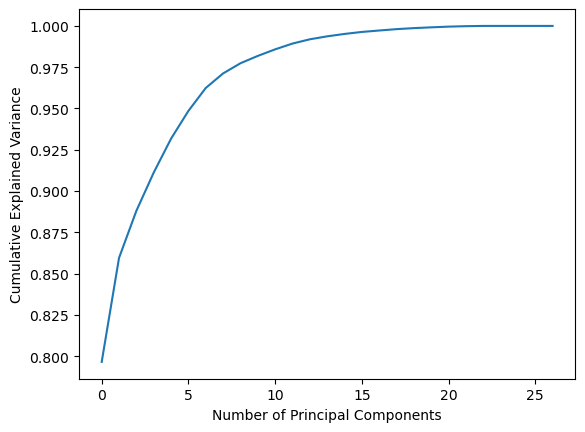

In [511]:
from sklearn.decomposition import PCA
import numpy as np

# Separate features and target variable
X = df_transformed.drop('Success', axis=1)
y = df_transformed['Success']

# Apply PCA to calculate cumulative explained variance
pca = PCA()
X_pca = pca.fit_transform(X)

# Calculate cumulative explained variance
cumulative_var = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
import matplotlib.pyplot as plt
plt.plot(cumulative_var)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [512]:
# Choose number of components based on cumulative explained variance
n_components = np.argmax(cumulative_var >= 0.95) + 1
print('Number of components:', n_components)

Number of components: 7


In [513]:
# Apply PCA with chosen number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
# Access the principal components and explained variance ratios
principal_components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame to store the principal components and their corresponding feature names
components_df = pd.DataFrame(principal_components.T, columns=['PC{}'.format(i+1) for i in range(len(principal_components))])

# Assuming 'data' is a DataFrame with column names representing the original features
feature_names = X.columns.tolist()

# Add the original feature names to the components DataFrame
components_df['Feature'] = feature_names

# Print the DataFrame showing the original feature names and their corresponding principal components
print(components_df)

         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   0.158311  0.447224 -0.427699  0.120281  0.239528  0.055973 -0.596856   
1  -0.002130 -0.004633  0.005975 -0.000370 -0.001917 -0.022430  0.002175   
2  -0.035229  0.035383 -0.158381  0.312419 -0.110237  0.218718  0.247269   
3  -0.001450 -0.004866 -0.008410 -0.001382 -0.020659 -0.017050  0.020986   
4  -0.013640 -0.110857  0.123925 -0.089840 -0.225980 -0.055224 -0.262932   
5  -0.013011 -0.031856  0.072150 -0.017006  0.007713  0.029134 -0.104758   
6   0.010706 -0.056836  0.021540  0.031837  0.012153 -0.053175  0.035990   
7  -0.006199 -0.001513 -0.130182 -0.167463  0.307364 -0.072527  0.010535   
8   0.005661 -0.001447  0.108933 -0.111497  0.040500  0.015945  0.239320   
9   0.055293  0.176624 -0.035550  0.043303 -0.008936 -0.043391 -0.188584   
10 -0.013496 -0.000679  0.166722  0.303427 -0.273025 -0.548053 -0.173688   
11  0.015326  0.023322 -0.077744 -0.040634 -0.083987  0.629184  0.005229   
12 -0.001831

**Doing Train Test Split**

In [589]:
from sklearn import decomposition
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [590]:
#train test split
X_train, X_test, y_train, y_test =  train_test_split(X_pca, y, random_state=42, test_size=0.3)

since our dataset is not too big, the tuning strategy I will apply is gridsearch CV, this technique is basically create table of possible hyper parameters and do a permutation and combination for testing all posible combination of hyper parameters. There is also some parameters need to be pre-defined for the gridsearch CV model, the most important one is 'scoring', this is the method of marking our hypyparameter combinations.  Since our dataset is very unbalance, which means there is more successful landing result comparing to negative results. Although understanding how the successful data is important, knowing the reason of failure could provide our better knowledge to avoid next failure. Therefore, the marking method ('scoring') is f1, which can be calculated by (2*Precision*recall)/(Precision+Recall). The Precision = True Positive/(True Positive + False Positive) and Recall = Ture Positive /(True Positive/False Negative). By looking at the fomula, we can tell that f1 score put more attention on when we failing to predict a negative result.  
The first model I would Apply is Decision Tree, it is tree structure method. The model will look at one predictor each time when doing a spliting, and the threhold to decide which predictor to look on is the hypyparameter 'criterion'. The Max depth describe how deep the tree can grow to, wihout setting this hypyparameter, we will have a fully grown tree at the end. A fully-grown tree will have risk of being overfitting, Which means the model will capture some identical feature of our training model and will do a poor prediction on the testing data. 

**Applying Decision tree Classification (Including grid search for best hyperparameter)**

In [591]:
import numpy as np
dt_before_tuned = DecisionTreeClassifier(random_state=42)
criterion = ['gini', 'entropy', 'log_loss']
max_depth = [int(x) for x in np.linspace(1, 100, num = 50)]
splitter = ['best', 'random']
min_samples_split = list(range(2, 11))
min_samples_leaf = list(range(1, 11))
max_features = ['auto', 'sqrt', 'log2']
dt_random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion' : criterion,
                 'splitter' : splitter}
dt_random = RandomizedSearchCV(estimator = dt_before_tuned, param_distributions = dt_random_grid, 
                               n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='f1')
dt_random.fit(X_pca, y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END criterion=gini, max_depth=59, max_features=auto, min_samples_leaf=8, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=59, max_features=auto, min_samples_leaf=8, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=59, max_features=auto, min_samples_leaf=8, min_samples_split=6, splitter=random; total time=   0.0s[CV] END criterion=gini, max_depth=59, max_features=auto, min_samples_leaf=8, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=59, max_features=auto, min_samples_leaf=8, min_samples_split=6, splitter=random; total time=   0.0s[CV] END criterion=gini, max_depth=59, max_features=auto, min_samples_leaf=8, min_samples_split=6, splitter=random; total time=   0.0s

[CV] END criterion=gini, max_depth=59, max_features=auto, min_samples_leaf=8, min_samples_split=6, splitter=random; total time=   0.0s

[CV] END criterion=gini, max_depth=59, max_features=aut

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_

 min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=33, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=43, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=47, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=49, max_features=log2, min_samples_leaf=7, min_samples_

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19, 21, 23, 25, 27,
                                                      29, 31, 33, 35, 37, 39,
                                                      41, 43, 45, 47, 49, 51,
                                                      53, 55, 57, 59, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='f1', verbose=2)

In [592]:
#show the search space
dt_random_grid

{'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [1,
  3,
  5,
  7,
  9,
  11,
  13,
  15,
  17,
  19,
  21,
  23,
  25,
  27,
  29,
  31,
  33,
  35,
  37,
  39,
  41,
  43,
  45,
  47,
  49,
  51,
  53,
  55,
  57,
  59,
  61,
  63,
  65,
  67,
  69,
  71,
  73,
  75,
  77,
  79,
  81,
  83,
  85,
  87,
  89,
  91,
  93,
  95,
  97,
  100],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random']}

In [593]:
dt_random.best_score_

0.844052614052614

In [594]:
dt_random.best_params_

{'splitter': 'random',
 'min_samples_split': 9,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 17,
 'criterion': 'entropy'}

In [595]:
#Apply Decision tree calssifier with best parameters
dt_after_tuned = DecisionTreeClassifier(splitter = 'random', min_samples_split = 9,
                                       min_samples_leaf = 3, max_features = 'sqrt',
                                       max_depth = 17, criterion='entropy', random_state=42)
dt_after_tuned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=17, max_features='sqrt',
                       min_samples_leaf=3, min_samples_split=9, random_state=42,
                       splitter='random')

In [596]:
train_pred_dt = dt_after_tuned.predict(X_train)
test_pred_dt = dt_after_tuned.predict(X_test)
train_loss_dt = 1 - accuracy_score(y_train, train_pred_dt)
test_loss_dt = 1 - accuracy_score(y_test, test_pred_dt)
f1_train_dt = f1_score(y_train, train_pred_dt)
f1_test_dt = f1_score(y_test, test_pred_dt)
print("Training loss:", train_loss_dt)
print("Test loss: ", test_loss_dt)
print('f1 score on training dataset', f1_train_dt)
print('f1 score on testing dataset', f1_test_dt)

Training loss: 0.17460317460317465
Test loss:  0.11111111111111116
f1 score on training dataset 0.8607594936708861
f1 score on testing dataset 0.9230769230769231


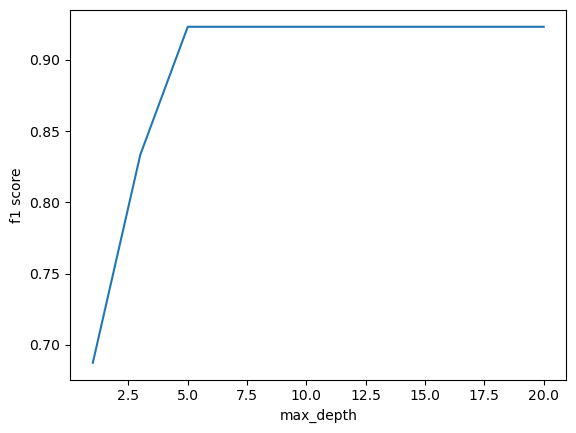

In [597]:
#plot max_depth vs testing f1 score
max_depth = [int(x) for x in np.linspace(1, 20, num = 10)]
test_f1 = []
for i in max_depth:
    decision_tree_max_depth = DecisionTreeClassifier(splitter = 'random', min_samples_split = 9,
                                       min_samples_leaf = 3, max_features = 'sqrt',
                                       max_depth = i, criterion='entropy', random_state=42)
    decision_tree_max_depth.fit(X_train, y_train)
    test_pred = decision_tree_max_depth.predict(X_test)
    test_f1.append(f1_score(y_test, test_pred))
plt.plot(max_depth, test_f1)
plt.xlabel('max_depth')
plt.ylabel('f1 score')
plt.show()


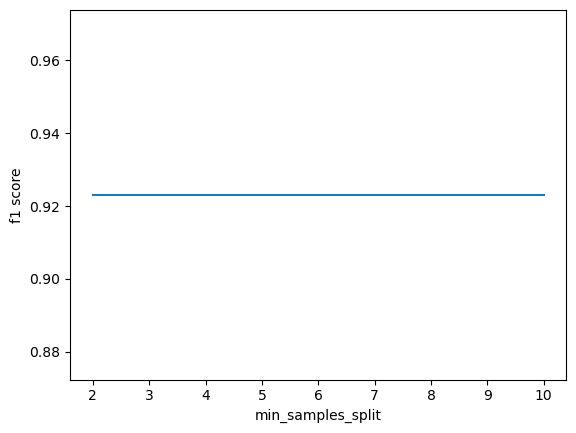

In [598]:
#plot min_samples_split vs testing f1 score
min_samples_split = list(range(2, 11))
test_f1 = []
for i in min_samples_split:
    decision_tree_min_samples_split = DecisionTreeClassifier(splitter = 'random', min_samples_split = i,
                                       min_samples_leaf = 3, max_features = 'sqrt',
                                       max_depth = 17, criterion='entropy', random_state=42)
    decision_tree_min_samples_split.fit(X_train, y_train)
    test_pred = decision_tree_min_samples_split.predict(X_test)
    test_f1.append(f1_score(y_test, test_pred))
plt.plot(min_samples_split, test_f1)
plt.xlabel('min_samples_split')
plt.ylabel('f1 score')
plt.show()

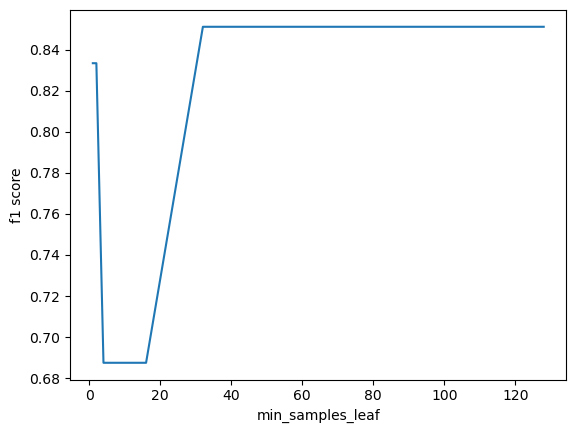

In [599]:
#plot min_samples_leaf vs testing f1 score
min_samples_leaf = [1, 2, 4, 8, 16, 32, 64, 128]
test_f1 = []
for i in min_samples_leaf:
    decision_tree_min_samples_leaf = DecisionTreeClassifier(splitter = 'random', min_samples_split = 9,
                                       min_samples_leaf = i, max_features = 'sqrt',
                                       max_depth = 17, criterion='entropy', random_state=42)
    decision_tree_min_samples_leaf.fit(X_train, y_train)
    test_pred = decision_tree_min_samples_leaf.predict(X_test)
    test_f1.append(f1_score(y_test, test_pred))
plt.plot(min_samples_leaf, test_f1)
plt.xlabel('min_samples_leaf')
plt.ylabel('f1 score')
plt.show()

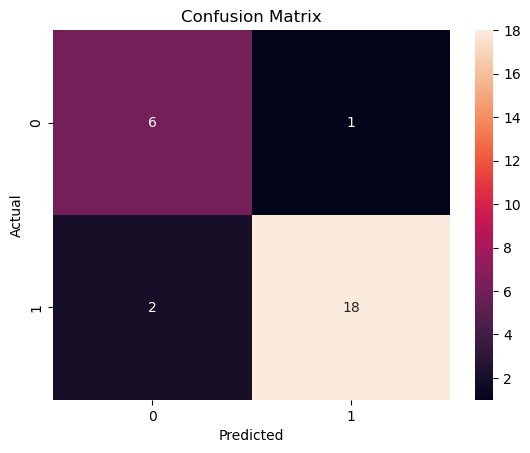

In [600]:
#plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_pred_dt)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


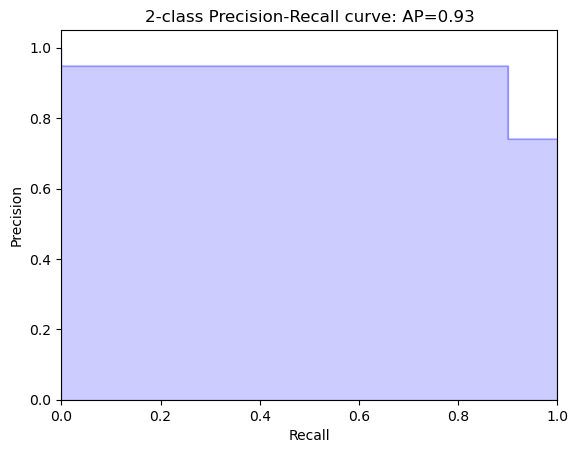

In [601]:
#plot precision-recall curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

average_precision_dt = average_precision_score(y_test, test_pred_dt)
precision_dt, recall_dt, _ = precision_recall_curve(y_test, test_pred_dt)

plt.step(recall_dt, precision_dt, color='b', alpha=0.2, where='post')
plt.fill_between(recall_dt, precision_dt, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision_dt))

plt.show()

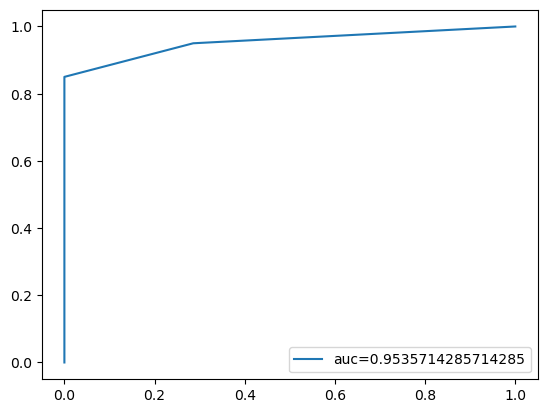

In [602]:
#plot ROC curve
from sklearn.metrics import roc_curve, auc
y_pred_proba = dt_after_tuned.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = auc(fpr, tpr)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

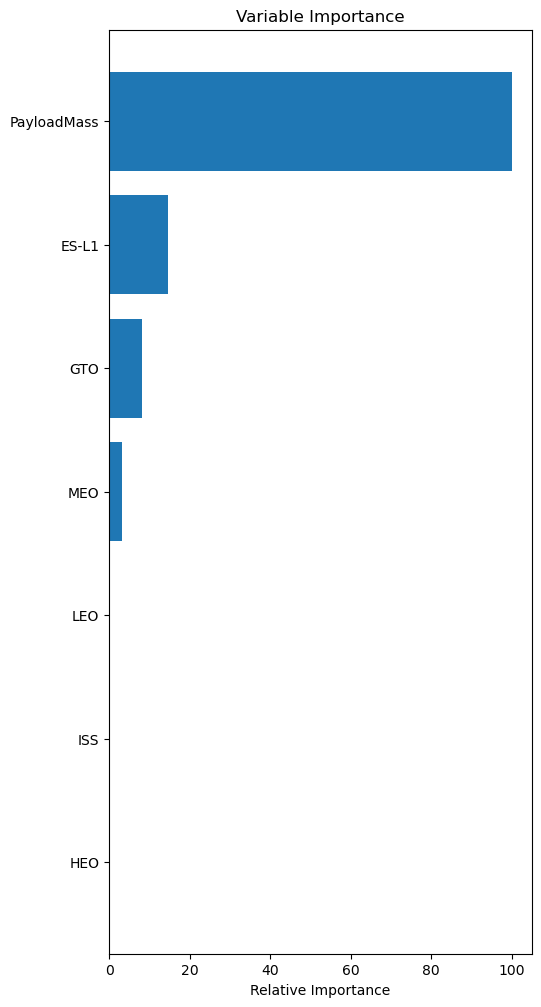

In [603]:
#Plot feature importance
import matplotlib.pyplot as plt
import seaborn as sns
feature_importance = dt_after_tuned.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns.values[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()



**Applying random forest classifier**

In [604]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
rfc=RandomForestClassifier(random_state=42)
import numpy as np
rfc = RandomForestClassifier(random_state=42)
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
creterion = ['gini', 'entropy','log_loss']
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 20, num = 2)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
                'criterion': creterion,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator=rfc, param_distributions = random_grid, 
                               n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='f1')
rf_random.fit(X_pca,y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=1, max_fe

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   2.1s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   2.1s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   2.1s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   2.1s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   2.1s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   2.1s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20,

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   1.7s
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   1.7s
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   1.7s
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   1.7s
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   1.7s
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   1.8s
[CV] END bootstrap=False, criterion=entropy, max_dep

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samp

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.4s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1,

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_dept

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   2.0s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   2.0s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   1.9s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   2.0s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   1.9s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   2.0s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20,

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   2.1s
[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_featur

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.9s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.9s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.9s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.9s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.9s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   1.0s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20,

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   1.0s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=1, max_features

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.2s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.2s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=auto,

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.2s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.3s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.2s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=au

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, ma

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.8s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.7s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.7s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.1s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.0s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.0s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.1s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.5s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.5s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.3s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.2s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.2s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   1.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   1.6s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   1.6s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   1.6s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.6s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_fe

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.7s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.7s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.7s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.7s
[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.7s
[CV] END bootstrap=False, criterion=entropy, max_d

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=log_lo

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_le

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_sampl

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.3s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, 

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.9s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_le

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.6s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_fe

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   1.9s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   2.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   2.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   1.9s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   2.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_fea

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   2.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   2.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   2.0s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   1.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   1.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   1.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   1.9s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   1.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   1.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   1.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   1.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   1.9s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   1.8s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.3s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=2

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.4s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.5s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.7s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=au

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_lea

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.0s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samp

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_sampl

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=log_loss, max_dep

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samp

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   1.9s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   1.9s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   2.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   2.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   2.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   2.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samp

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   2.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=auto, mi

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   1.9s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   1.9s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   2.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   1.9s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   2.1s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   2.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   2.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   2.2s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=log_loss, max_dep

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   0.6s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   0.6s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   1.6s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   1.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   1.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   1.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   1.6s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   1.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   1.9s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   1.7s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   1.7s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   1.7s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   1.7s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   1.7s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   1.6s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   1.7s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   1.8s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   1.7s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   1.8s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   1.3s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   1.3s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   1.3s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   1.4s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   1.3s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   1.3s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   1.3s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   1.3s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   1.3s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   1.3s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time=   1.1s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time=   1.1s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time=   1.2s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time=   1.1s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time=   1.1s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time=   1.1s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time=   1.1s
[CV] END bootstrap=False, criterion=log_loss, max_de

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   1.5s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   1.4s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   1.4s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   1.5s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   1.5s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   1.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   1.5s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   1.5s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   1.5s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   1.5s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time=   1.2s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time=   1.1s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time=   1.2s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time=   1.2s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time=   1.1s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time=   1.2s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time=   1.1s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time=   1.2s
[CV] END bootstrap=False, criterion=log_loss, max_de

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.8s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.8s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.9s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_f

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samp

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.0s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   0.6s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   0.6s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   0.6s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   1.2s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   1.0s
[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   1.1s
[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   1.1s
[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   1.0s
[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   1.1s
[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   1.0s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   1.1s
[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   1.0s
[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   1.1s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.6s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_le

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.6s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1,

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1,

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.3s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   1.6s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   1.7s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   1.7s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   1.7s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   1.8s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   1.6s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   1.7s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   1.8s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   1.6s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   1.7s


s might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitatio

[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_f

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.7s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.9s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.8s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   1.7s
[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   1.8s
[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   1.9s
[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   1.7s
[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   1.8s
[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   1.8s
[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_fe

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   1.8s
[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   1.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.4s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.4s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s


he past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/

[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20,

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.1s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.5s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, criterion=log_loss, max_de

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.8s


e at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ba

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, criterion=entr

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=None

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.3s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_fe

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   1.0s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   1.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   1.7s
[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   1.8s
[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   1.7s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   1.8s
[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   1.8s
[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   1.9s
[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   1.8s
[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   1.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   1.7s
[CV] END bootstrap=False, criterion=log_

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   1.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   1.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   1.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   1.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   1.7s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   1.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1,

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   1.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   0.9s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=1, 

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   0.9s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.7s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=auto, min_samp

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   1.7s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   1.6s
[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   1.8s
[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   1.8s
[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   1.7s
[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   1.7s
[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   1.8s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   1.9s
[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   1.8s
[CV] END bootstrap=True, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   1.9s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   1.6s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   1.6s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   1.6s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   1.6s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   1.7s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   1.6s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   1.6s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   1.6s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   1.7s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   1.7s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, mi

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.6s


he past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_fe

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   1.7s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   1.6s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   1.7s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   1.8s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   1.8s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   1.8s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   1.8s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   1.7s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   1.8s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   1.8s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   1.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   1.6s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   1.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   1.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   1.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   1.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   1.6s
[CV] END bootstrap=True, criterion=entropy, ma

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   1.6s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.0s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=entropy, ma

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, criterion=entropy, max_d

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=log_loss, max_dept

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   2.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   2.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   2.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_fe

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=log_loss, max_depth=1, max_f

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=2, m

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, criterion=log_loss, max_depth

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   1.5s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   1.4s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   1.5s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   1.4s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   1.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   1.4s
[CV] END bootstrap=False, criterion=log_loss, max_de

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   1.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   1.8s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time=   1.4s
[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time=   1.4s
[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time=   1.4s
[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time=   1.4s
[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time=   1.4s
[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time=   1.4s
[CV] END bootstrap=False, criterion=log_

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time=   1.4s
[CV] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time=   1.3s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, m

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.7s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   1.9s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   1.9s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   1.9s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   1.9s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   1.9s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   1.9s
[CV] END bootstrap=True, criterion=log_loss, m

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   1.8s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   1.9s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.9s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=log_loss, max_dep

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.9s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.6s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.5s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   1.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   2.0s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   2.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_fea

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.4s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.4s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   1.8s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   1.8s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   1.7s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   1.8s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   1.8s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   1.8s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   2.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   1.8s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. Thi

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   1.9s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


[CV] END bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   1.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   1.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   1.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   1.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   1.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   1.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=1, max_fe

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=2)

In [605]:
rf_random.best_score_

0.8526373626373628

In [606]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'gini',
 'bootstrap': True}

In [607]:
rf_after_tuned = RandomForestClassifier(n_estimators = 400, random_state = 42,
                                 min_samples_split=10, 
                                 min_samples_leaf=2,
                                 max_features='sqrt', 
                                 max_depth=20,
                                criterion='gini',
                                 bootstrap=True)
rf_after_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=400, random_state=42)

In [546]:
train_pred_rf = rf_after_tuned.predict(X_train)
test_pred_rf = rf_after_tuned.predict(X_test)
train_loss_rf = 1 - accuracy_score(y_train, train_pred_rf)
test_loss_rf = 1 - accuracy_score(y_test, test_pred_rf)
f1_train_rf = f1_score(y_train, train_pred_rf)
f1_test_rf = f1_score(y_test, test_pred_rf)
print("Training loss:", train_loss_rf)
print("Test loss: ", test_loss_rf)
print('f1 score on training dataset', f1_train_rf)
print('f1 score on testing dataset', f1_test_rf)

Training loss: 0.06349206349206349
Test loss:  0.07407407407407407
f1 score on training dataset 0.9523809523809523
f1 score on testing dataset 0.9523809523809523


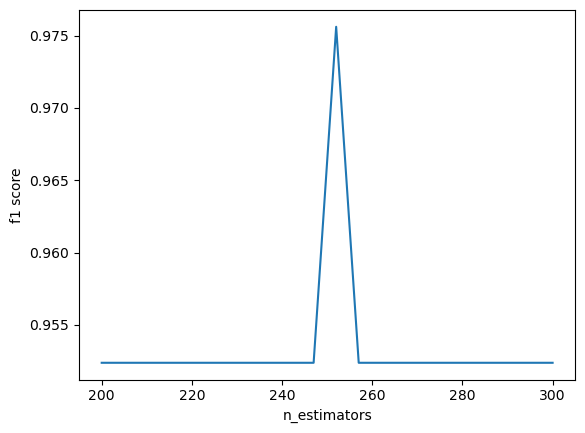

In [547]:
#plot n_estimators vs testing f1 score
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 300, num = 20)]
test_f1 = []
for i in n_estimators:
    rfc = RandomForestClassifier(random_state=42, n_estimators=i)
    rfc.fit(X_train, y_train)
    test_pred = rfc.predict(X_test)
    test_f1.append(f1_score(y_test, test_pred))
plt.plot(n_estimators, test_f1)
plt.xlabel('n_estimators')
plt.ylabel('f1 score')
plt.show()

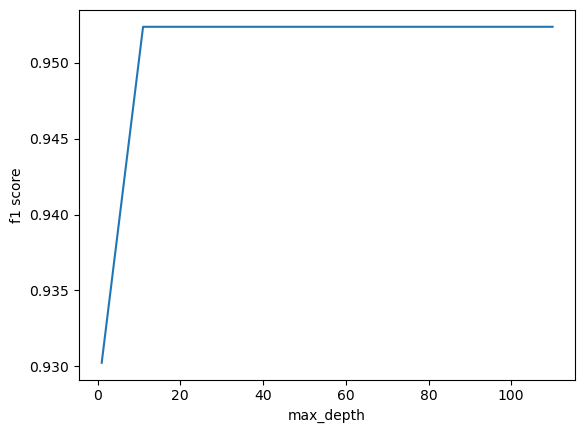

In [541]:
#plot max_depth vs testing f1 score
max_depth = [int(x) for x in np.linspace(1, 110, num = 11)]
test_f1 = []
for i in max_depth:
    rfc = RandomForestClassifier(random_state=42, n_estimators=400, max_depth=i)
    rfc.fit(X_train, y_train)
    test_pred = rfc.predict(X_test)
    test_f1.append(f1_score(y_test, test_pred))
plt.plot(max_depth, test_f1)
plt.xlabel('max_depth')
plt.ylabel('f1 score')
plt.show()

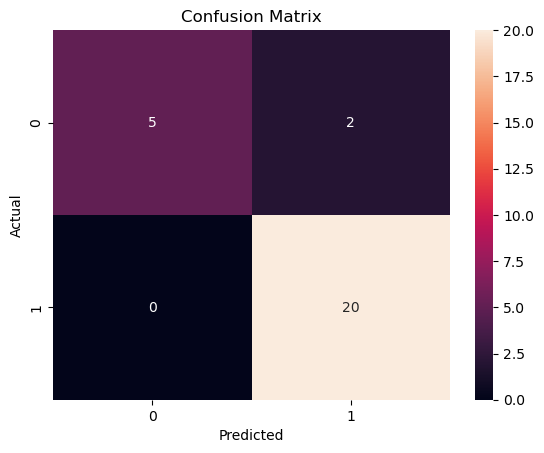

In [537]:
#plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_pred_rf)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

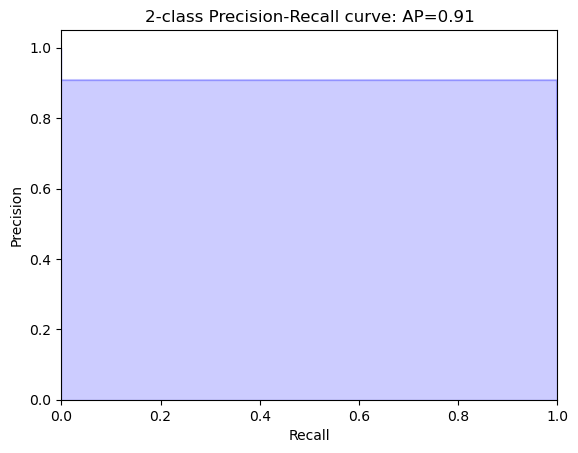

In [538]:
#plot precision-recall curve
average_precision_rf = average_precision_score(y_test, test_pred_rf)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, test_pred_rf)

plt.step(recall_rf, precision_rf, color='b', alpha=0.2, where='post')
plt.fill_between(recall_rf, precision_rf, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision_rf))

plt.show()

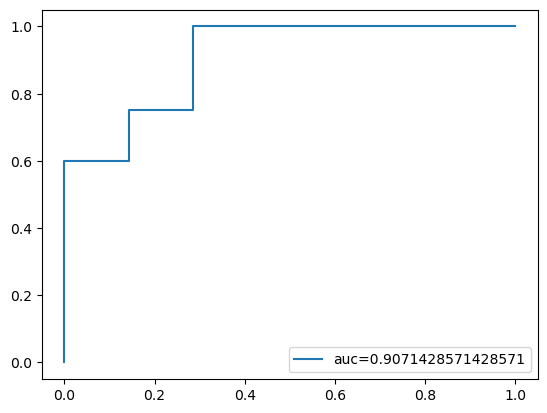

In [539]:
#plot ROC curve
from sklearn.metrics import roc_curve, auc
y_pred_proba = rf_after_tuned.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = auc(fpr, tpr)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

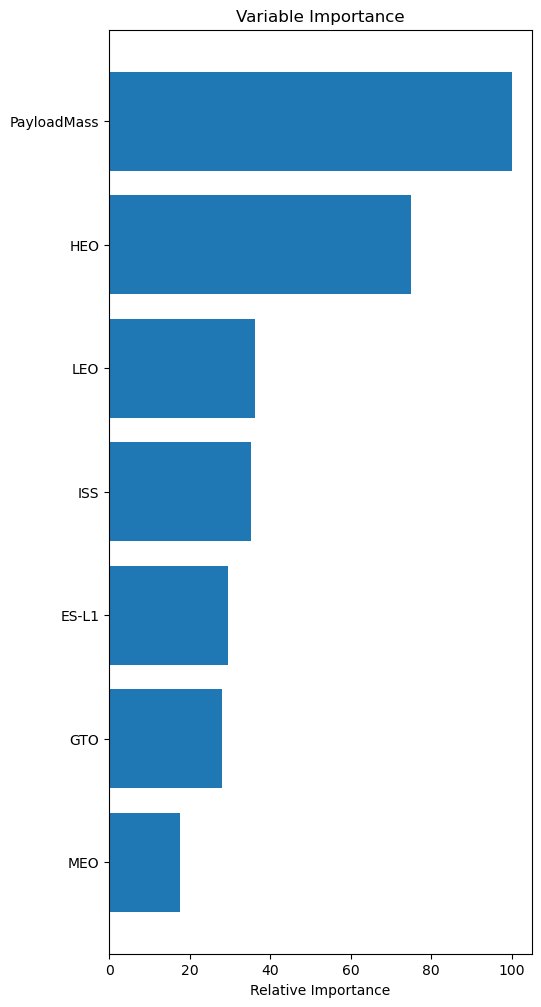

In [540]:
#Plot feature importance
import matplotlib.pyplot as plt
import seaborn as sns
feature_importance = rf_after_tuned.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

**Applying Logistic Regression**

In [325]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42)

In [327]:
penalty = ['l1', 'l2', 'elasticnet']
C = np.logspace(-4, 4, 50)
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
parameters_tune2 = {'penalty': penalty, 'C' : C, 'solver' : solver}
lr_rs = RandomizedSearchCV(estimator = lr, param_distributions=parameters_tune2 ,n_iter = 100, cv = 3, 
                     verbose=2, random_state=42, n_jobs = -1, scoring='f1')
lr_rs.fit(X_pca, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END C=0.00030888435964774815, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.00030888435964774815, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.00030888435964774815, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=2222.996482526191, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=2222.996482526191, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.009102981779915217, penalty=elasticnet, solver=newton-cholesky; total time=   0.0s
[CV] END C=0.009102981779915217, penalty=elasticnet, solver=newton-cholesky; total time=   0.0s
[CV] END C=0.009102981779915217, penalty=elasticnet, solver=newton-cholesky; total time=   0.0s
[CV] END C=16.768329368110066, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=2222.996482526191, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=16.768329368110066, penalty=elasticnet, solver=lbf

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sandiego/opt/anaconda3/lib/p

RandomizedSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2....
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   random_state=42, scoring='f1', verbose=2)

In [328]:
lr_rs.best_params_

{'solver': 'saga', 'penalty': 'l2', 'C': 339.3221771895323}

In [329]:
lr_rs.best_score_

0.8372675146258404

In [330]:
lr_tuned = LogisticRegression(penalty = 'l2', dual = False, C =339.3221771895323, solver='saga',
                              random_state = 42)
lr_tuned.fit(X_train, y_train)

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=339.3221771895323, random_state=42, solver='saga')

In [332]:
train_pred_lr = lr_tuned.predict(X_train)
test_pred_lr = lr_tuned.predict(X_test)
train_loss_lr = 1 - accuracy_score(y_train, train_pred_lr)
test_loss_lr = 1 - accuracy_score(y_test, test_pred_lr)
f1_train_lr = f1_score(y_train, train_pred_lr)
f1_test_lr = f1_score(y_test, test_pred_lr)
print("Training loss:", train_loss_lr)
print("Test loss: ", test_loss_lr)
print('f1 score on training dataset', f1_train_lr)
print('f1 score on testing dataset', f1_test_lr)

Training loss: 0.12698412698412698
Test loss:  0.18518518518518523
f1 score on training dataset 0.9024390243902439
f1 score on testing dataset 0.8780487804878048


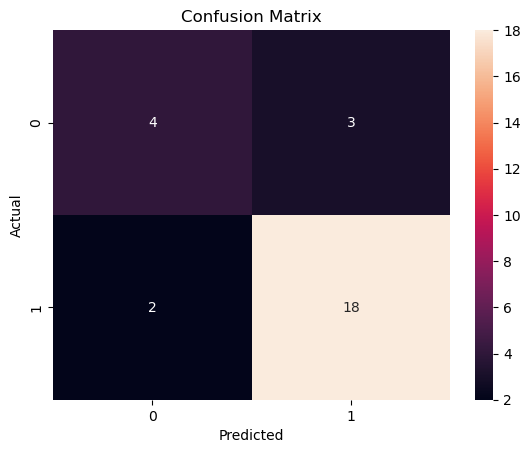

In [456]:
#plot confusion matrix
cm = confusion_matrix(y_test, test_pred_lr)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.85')

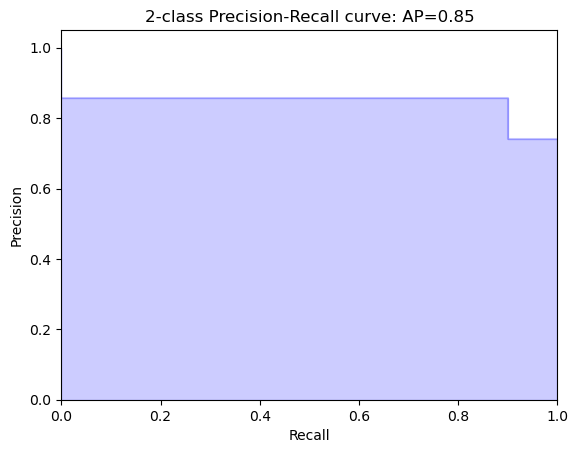

In [458]:
#plot precision-recall curve
average_precision_lr = average_precision_score(y_test, test_pred_lr)
precision_lr, recall_lr, _ = precision_recall_curve(y_test, test_pred_lr)
plt.step(recall_lr, precision_lr, color='b', alpha=0.2, where='post')
plt.fill_between(recall_lr, precision_lr, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision_lr))

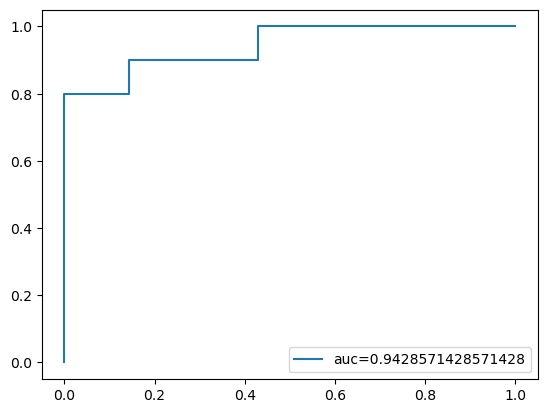

In [463]:
# plot roc curve
y_pred_proba = lr_tuned.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = auc(fpr, tpr)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

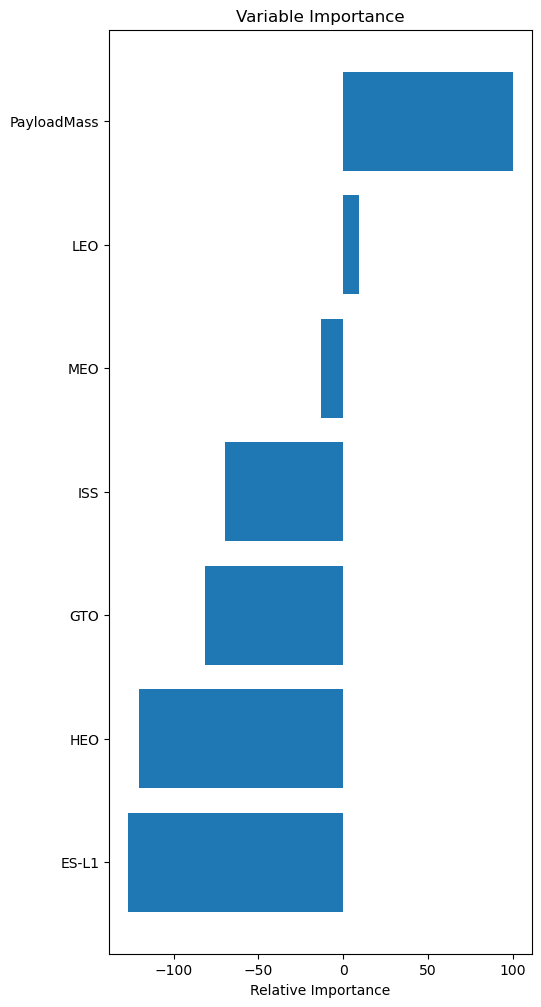

In [421]:
#visualize the result
import matplotlib.pyplot as plt
import seaborn as sns
feature_importance = lr_tuned.coef_[0]
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


In [333]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

svm_model = SVC(random_state=42)

# Define hyperparameters for tuning
param_grid_svm = {'C': [0.1, 1, 10, 100, 200, 300],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

# Perform grid search to find best hyperparameters
grid_svm = GridSearchCV(svm_model, param_grid_svm, refit=True, verbose=3)
grid_svm.fit(X_pca, y)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.667 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.833 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.778 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.889 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.778 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.667 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 200, 300],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             verbose=3)

In [553]:
print("Best hyperparameters:", grid_svm.best_params_)

Best hyperparameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [554]:
grid_svm.best_score_

0.8

In [470]:
svm_tuned = SVC(C=100, gamma=0.001, kernel='rbf',probability=True)
svm_tuned.fit(X_train, y_train)

SVC(C=100, gamma=0.001, probability=True)

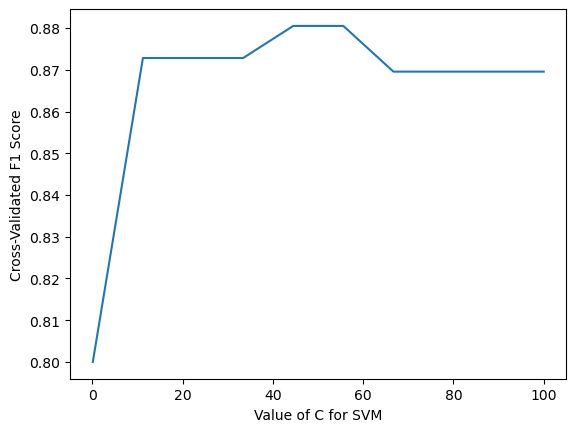

In [558]:
#plot the correlation between C and F1 score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
C_range = np.linspace(0.1, 100, 10)
C_scores = []
for c in C_range:
    svm = SVC(C=c, gamma=0.001, kernel='rbf')
    scores = cross_val_score(svm, X_pca, y, cv=10, scoring='f1')
    C_scores.append(scores.mean())
plt.plot(C_range, C_scores)
plt.xlabel('Value of C for SVM')
plt.ylabel('Cross-Validated F1 Score')
plt.show()

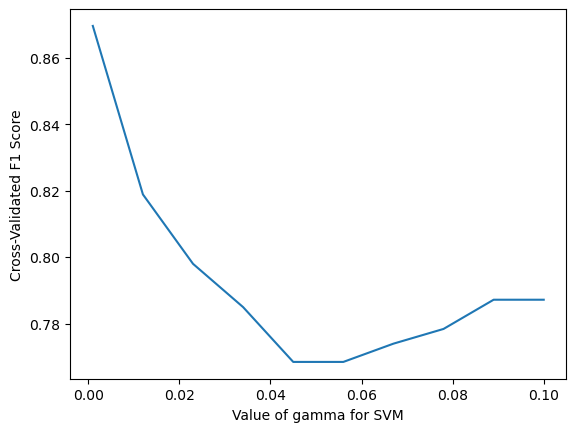

In [559]:
#plot the correlation between gamma and F1 score
gamma_range = np.linspace(0.001, 0.1, 10)
gamma_scores = []
for g in gamma_range:
    svm = SVC(C=100, gamma=g, kernel='rbf')
    scores = cross_val_score(svm, X_pca, y, cv=10, scoring='f1')
    gamma_scores.append(scores.mean())
plt.plot(gamma_range, gamma_scores)
plt.xlabel('Value of gamma for SVM')
plt.ylabel('Cross-Validated F1 Score')
plt.show()

In [471]:
train_pred_svm = svm_tuned.predict(X_train)
test_pred_svm = svm_tuned.predict(X_test)
train_loss_svm = 1 - accuracy_score(y_train, train_pred_svm)
test_loss_svm = 1 - accuracy_score(y_test, test_pred_svm)
f1_train_svm = f1_score(y_train, train_pred_svm)
f1_test_svm = f1_score(y_test, test_pred_svm)
print("Training loss:", train_loss_svm)
print("Test loss: ", test_loss_svm)
print('f1 score on training dataset', f1_train_svm)
print('f1 score on testing dataset', f1_test_svm)

Training loss: 0.15873015873015872
Test loss:  0.14814814814814814
f1 score on training dataset 0.8809523809523809
f1 score on testing dataset 0.9047619047619048


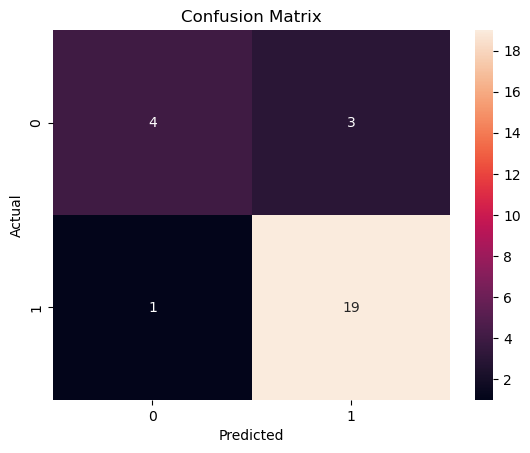

In [472]:
#plot confusion matrix
cm = confusion_matrix(y_test, test_pred_svm)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.86')

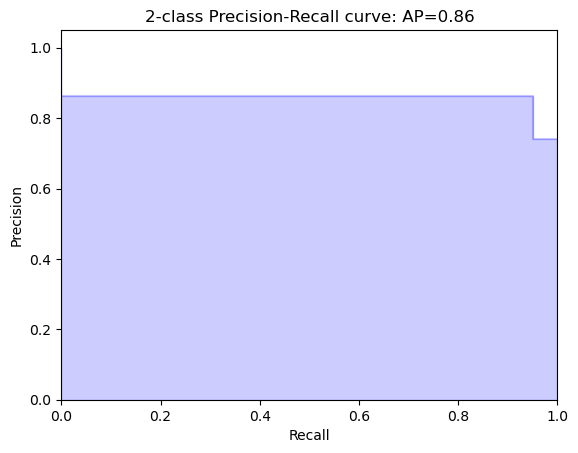

In [473]:
#plot precision-recall curve
average_precision_svm = average_precision_score(y_test, test_pred_svm)
precision_svm, recall_svm, _ = precision_recall_curve(y_test, test_pred_svm)
plt.step(recall_svm, precision_svm, color='b', alpha=0.2, where='post')
plt.fill_between(recall_svm, precision_svm, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision_svm))

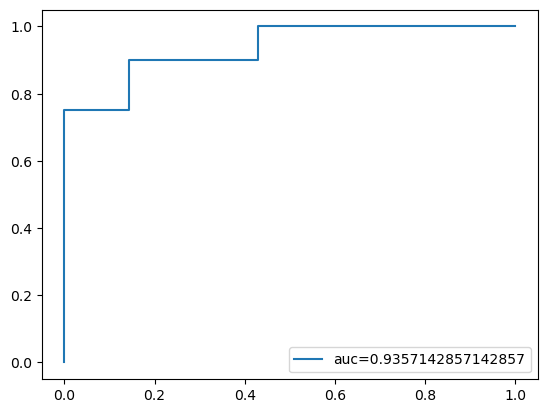

In [476]:
# plot auc curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_pred_proba = svm_tuned.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = auc(fpr, tpr)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

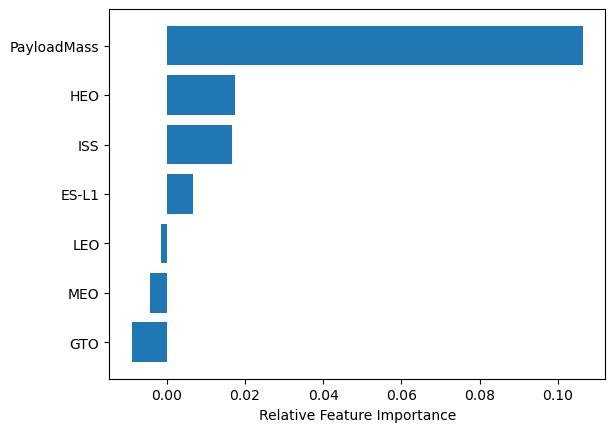

In [577]:
#plot feature importance with permutation_importance
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(svm_tuned, X_pca, y, scoring='f1')
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Relative Feature Importance")
plt.show()

In [666]:
#Apply neural network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000, random_state=42)
# Define hyperparameters for tuning
param_grid_mlp = {'hidden_layer_sizes': [(10,10,10), (10, 20, 10), (10, 15, 10)], 
                  'activation': ['tanh', 'relu'], 
                  'learning_rate': ['constant', 'invscaling', 'adaptive'], 
                  'solver': ['lbfgs', 'sgd', 'adam']}
# Perform grid search to find best hyperparameters
grid_mlp = RandomizedSearchCV(mlp, param_grid_mlp, refit=True, verbose=3, cv=10, random_state=42)
grid_mlp.fit(X_pca, y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END activation=tanh, hidden_layer_sizes=(10, 15, 10), learning_rate=constant, solver=sgd;, score=0.444 total time=   0.3s
[CV 2/10] END activation=tanh, hidden_layer_sizes=(10, 15, 10), learning_rate=constant, solver=sgd;, score=0.889 total time=   0.2s
[CV 3/10] END activation=tanh, hidden_layer_sizes=(10, 15, 10), learning_rate=constant, solver=sgd;, score=1.000 total time=   0.2s
[CV 4/10] END activation=tanh, hidden_layer_sizes=(10, 15, 10), learning_rate=constant, solver=sgd;, score=0.667 total time=   0.2s
[CV 5/10] END activation=tanh, hidden_layer_sizes=(10, 15, 10), learning_rate=constant, solver=sgd;, score=0.556 total time=   0.2s
[CV 6/10] END activation=tanh, hidden_layer_sizes=(10, 15, 10), learning_rate=constant, solver=sgd;, score=0.889 total time=   0.2s
[CV 7/10] END activation=tanh, hidden_layer_sizes=(10, 15, 10), learning_rate=constant, solver=sgd;, score=0.778 total time=   0.2s
[CV 8/10] END

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



[CV 1/10] END activation=relu, hidden_layer_sizes=(10, 15, 10), learning_rate=adaptive, solver=sgd;, score=0.444 total time=   0.3s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



[CV 2/10] END activation=relu, hidden_layer_sizes=(10, 15, 10), learning_rate=adaptive, solver=sgd;, score=1.000 total time=   0.3s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



[CV 3/10] END activation=relu, hidden_layer_sizes=(10, 15, 10), learning_rate=adaptive, solver=sgd;, score=1.000 total time=   0.3s
[CV 4/10] END activation=relu, hidden_layer_sizes=(10, 15, 10), learning_rate=adaptive, solver=sgd;, score=0.778 total time=   0.3s
[CV 5/10] END activation=relu, hidden_layer_sizes=(10, 15, 10), learning_rate=adaptive, solver=sgd;, score=0.667 total time=   0.2s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



[CV 6/10] END activation=relu, hidden_layer_sizes=(10, 15, 10), learning_rate=adaptive, solver=sgd;, score=0.889 total time=   0.3s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



[CV 7/10] END activation=relu, hidden_layer_sizes=(10, 15, 10), learning_rate=adaptive, solver=sgd;, score=0.778 total time=   0.3s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



[CV 8/10] END activation=relu, hidden_layer_sizes=(10, 15, 10), learning_rate=adaptive, solver=sgd;, score=0.889 total time=   0.3s
[CV 9/10] END activation=relu, hidden_layer_sizes=(10, 15, 10), learning_rate=adaptive, solver=sgd;, score=0.889 total time=   0.2s
[CV 10/10] END activation=relu, hidden_layer_sizes=(10, 15, 10), learning_rate=adaptive, solver=sgd;, score=0.667 total time=   0.2s
[CV 1/10] END activation=tanh, hidden_layer_sizes=(10, 10, 10), learning_rate=invscaling, solver=lbfgs;, score=0.556 total time=   0.0s
[CV 2/10] END activation=tanh, hidden_layer_sizes=(10, 10, 10), learning_rate=invscaling, solver=lbfgs;, score=0.889 total time=   0.0s
[CV 3/10] END activation=tanh, hidden_layer_sizes=(10, 10, 10), learning_rate=invscaling, solver=lbfgs;, score=1.000 total time=   0.0s
[CV 4/10] END activation=tanh, hidden_layer_sizes=(10, 10, 10), learning_rate=invscaling, solver=lbfgs;, score=0.444 total time=   0.0s
[CV 5/10] END activation=tanh, hidden_layer_sizes=(10, 10, 

/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



[CV 9/10] END activation=relu, hidden_layer_sizes=(10, 10, 10), learning_rate=invscaling, solver=adam;, score=0.889 total time=   0.3s
[CV 10/10] END activation=relu, hidden_layer_sizes=(10, 10, 10), learning_rate=invscaling, solver=adam;, score=0.778 total time=   0.3s


/Users/sandiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



RandomizedSearchCV(cv=10,
                   estimator=MLPClassifier(max_iter=1000, random_state=42),
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': [(10, 10, 10),
                                                               (10, 20, 10),
                                                               (10, 15, 10)],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive'],
                                        'solver': ['lbfgs', 'sgd', 'adam']},
                   random_state=42, verbose=3)

In [667]:
# Show best parameters
print("Best hyperparameters:", grid_mlp.best_params_)
print("Best score:", grid_mlp.best_score_)

Best hyperparameters: {'solver': 'lbfgs', 'learning_rate': 'invscaling', 'hidden_layer_sizes': (10, 15, 10), 'activation': 'relu'}
Best score: 0.8555555555555555


In [668]:
#Apply neural network with best parameters
mlp_tuned = MLPClassifier(hidden_layer_sizes=(10, 15, 10), activation='relu', learning_rate='invscaling', solver='lbfgs',random_state=42)
mlp_tuned.fit(X_train, y_train)
#Predict on train and test set
train_pred_mlp = mlp_tuned.predict(X_train)
test_pred_mlp = mlp_tuned.predict(X_test)
#Calculate train and test loss
train_loss_mlp = 1 - accuracy_score(y_train, train_pred_mlp)
test_loss_mlp = 1 - accuracy_score(y_test, test_pred_mlp)
#Calculate train and test f1 score
f1_train_mlp = f1_score(y_train, train_pred_mlp)
f1_test_mlp = f1_score(y_test, test_pred_mlp)
print("Training loss:", train_loss_mlp)
print("Test loss: ", test_loss_mlp)
print('f1 score on training dataset', f1_train_mlp)
print('f1 score on testing dataset', f1_test_mlp)

Training loss: 0.0
Test loss:  0.11111111111111116
f1 score on training dataset 1.0
f1 score on testing dataset 0.9268292682926829


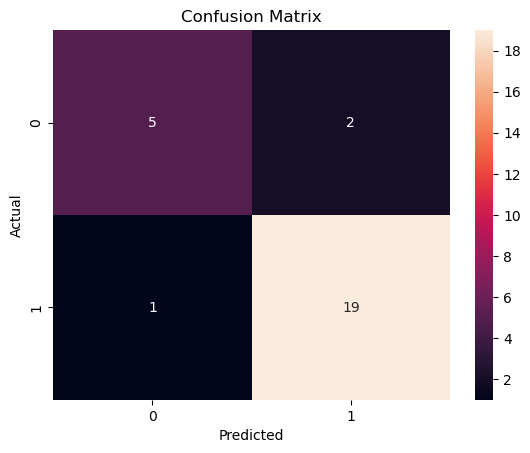

In [677]:
#plot confusion matrix
cm = confusion_matrix(y_test, test_pred_mlp)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.90')

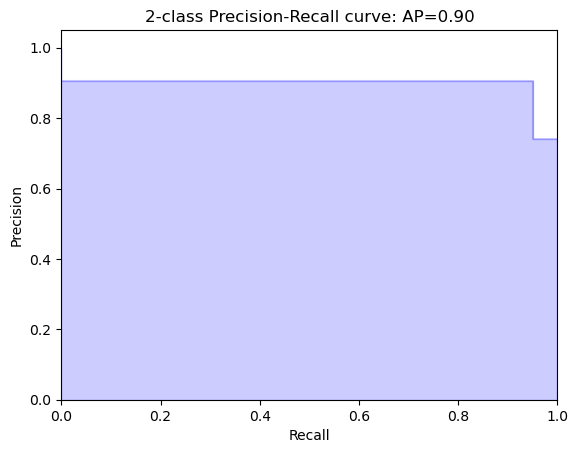

In [670]:
#plot precision-recall curve
average_precision_mlp = average_precision_score(y_test, test_pred_mlp)
precision_mlp, recall_mlp, _ = precision_recall_curve(y_test, test_pred_mlp)
plt.step(recall_mlp, precision_mlp, color='b', alpha=0.2, where='post')
plt.fill_between(recall_mlp, precision_mlp, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision_mlp))

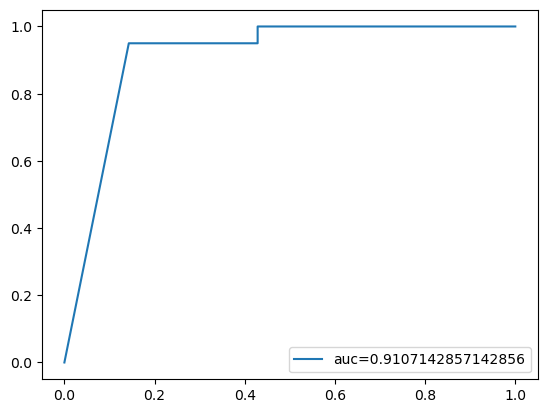

In [678]:
#plot auc curve for neural network
from sklearn.metrics import roc_curve, auc
y_pred_proba = mlp_tuned.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = auc(fpr, tpr)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [671]:
#train data f1 score comparison between 4 models
train_f1 = [f1_train_dt, f1_train_rf, f1_train_lr, f1_train_svm,f1_train_mlp]
model = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM', 'Neural Network']
#create the dataframe
train_f1_df = pd.DataFrame(list(zip(model, train_f1)), columns =['Algorithm', 'Train Data F1 Score'])
#Sort the dataframe
train_f1_df.sort_values(by=['Train Data F1 Score'], ascending=False, inplace=True)
train_f1_df

,Algorithm,Train Data F1 Score
4,Neural Network,1.000000
1,Random Forest,0.952381
2,Logistic Regression,0.902439
3,SVM,0.880952
0,Decision Tree,0.860759


In [672]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.bar(train_f1_df, x='Algorithm', y='Train Data F1 Score', hover_data=['Algorithm', 'Train Data F1 Score'], color='Algorithm')
fig.update_layout(title='Algorithm vs. Train Data F1 Score', xaxis_title='Algorithm', yaxis_title='Train Data F1 Score' )
#set the size of the graph
fig.update_layout(
    autosize=False,
    width=800,
    height=500,)
fig.show()

In [673]:
#test data f1 score comparison between models above
algorithms1 = {'Decision Tree':f1_test_dt,'Random Forest':f1_test_rf, 'Logistic Regression':f1_test_lr, 'SVM':f1_test_svm, 'Neural Network':f1_test_mlp}
test_f2_df = pd.DataFrame.from_dict(algorithms1, orient='index', columns=['Test Data F1 Score'])
test_f2_df.sort_values(['Test Data F1 Score'], ascending=False, inplace=True)
test_f2_df = test_f2_df.reset_index()
test_f2_df.rename(columns = {'index': 'Algorithm'}, inplace = True)
test_f2_df

,Algorithm,Test Data F1 Score
0,Random Forest,0.952381
1,Neural Network,0.926829
2,Decision Tree,0.923077
3,SVM,0.904762
4,Logistic Regression,0.878049


In [674]:
fig = px.bar(test_f2_df, x='Algorithm', y='Test Data F1 Score', hover_data=['Algorithm', 'Test Data F1 Score'], color='Algorithm')
fig.update_layout(title='Algorithm vs. Test Data F1 Score', xaxis_title='Algorithm', yaxis_title='Test Data F1 Score' )
#set the size of the graph
fig.update_layout(
    autosize=False,
    width=800,
    height=500,)
fig.show()

In [675]:
#test data f1 score comparison between models above
algorithms1 = {'Decision Tree':dt_random.best_score_,'Random Forest':rf_random.best_score_, 'Logistic Regression':lr_rs.best_score_ , 'SVM':grid_svm.best_score_, 'Neural Network':grid_mlp.best_score_}
test_f3_df = pd.DataFrame.from_dict(algorithms1, orient='index', columns=['Whole dataset F1 Score'])
test_f3_df.sort_values(['Whole dataset F1 Score'], ascending=False, inplace=True)
test_f3_df = test_f3_df.reset_index()
test_f3_df.rename(columns = {'index': 'Algorithm'}, inplace = True)
test_f3_df

,Algorithm,Whole dataset F1 Score
0,Neural Network,0.855556
1,Random Forest,0.852637
2,Decision Tree,0.844053
3,Logistic Regression,0.837268
4,SVM,0.800000


In [676]:
fig = px.bar(test_f3_df, x='Algorithm', y='Whole dataset F1 Score', hover_data=['Algorithm', 'Whole dataset F1 Score'], color='Algorithm')
fig.update_layout(title='Algorithm vs. Whole dataset F1 Score', xaxis_title='Algorithm', yaxis_title='Whole dataset F1 Score' )
#set the size of the graph
fig.update_layout(
    autosize=False,
    width=800,
    height=500,)
fig.show()